## Data
- **The SMS (text) data was downloaded from UCI datasets.**
- **It contains 5,574 SMS phone messages.**
- **The data were collected for the purpose of mobile phone spam research and have already been labeled as either spam or ham**

# Steps
-  **Import all the necessary Libraries for analysis, Visualization, Algorithms**
-   **Explore Data Analysis**
-   **Using NLP stopwords, tokenization**
-   **split the dataset**
-   **Build the model** 
-   **Use statical model analysis perfrom classification report(Confusion matrix , cohhen_kappa_score, AUC, ROC,accuracy)**

### Data Analysis

> **PANDAS :**
> - **Reference link for Pandas :** https://pandas.pydata.org/docs/reference/index.html 
    - Pandas provide high performance, fast, easy to use data structures and data analysis tools for manipulating numeric data and time series. Pandas is built on the numpy library and written in languages like Python, Cython, and C. In pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc.
>    
**NUMPY:**
> - **Reference link for Numpy :**  https://numpy.org/doc/stable/reference/
       - It is the fundamental library of python, used to perform scientific computing. It provides high-performance multidimensional arrays and tools to deal with them. A numpy array is a grid of values (of the same type) that are indexed by a tuple of positive integers, numpy arrays are fast, easy to understand, and give users the right to perform calculations across arrays.
       
       
 ### Data Visualizations
 - Data Visualization is the graphic representation of data. It converts a huge dataset into small graphs, thus aids in data analysis and predictions
       
**MATPLOTLIB**
>-**Reference link for Matplotlib :** https://scipy-lectures.org/intro/matplotlib/index.html
- It is a Python library used for plotting graphs with the help of other libraries like Numpy and Pandas. It is a powerful tool for visualizing data in Python. It is used for creating statical interferences and plotting 2D graphs of arrays

**SEABORN:**
> - **Reference link for Seaborn :** https://seaborn.pydata.org/api.html
- It is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy. It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library. It helps in visualizing univariate and bivariate data

**NLTK:**
> - **Reference link fro NLTK is :** https://www.nltk.org/book/ch03.html
> - pip install nltk to download the kit
- It contains libraries and programs for statistical language processing.
- It is one of the most powerful NLP libraries, which contains packages to make machines understand human language and reply to it with an appropriate response.

#### Import the modules needed.

In [1]:
# Import Pandas and NumPy

# importing numpy be used as an efficient multi-dimensional container of generic data.
import numpy as np  

#importing pandas it allows you to perform data manipulation create, manipulate and wrangle the data in python.
import pandas as pd


#   ---------- # Visualizations---------

# Import Libraries for plotting 

#Matplotlib is a Python 2D plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns


# importing NLTK (Natrual Language Tool Kit)
import nltk
#importing stopwords
from nltk.corpus import stopwords

#import string
import string


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import re


In [2]:
# Read the data of credit card fraud detection
# Here file is CSV i.e Comma Seperated Values
#df is a variable

df = pd.read_csv("./spam.csv")

### EDA  (Exploratory Data Analysis) :
- **head()**Understand your data using the head() function to look at the first few rows.
- **shape()**Review the dimensions of your data with the shape property.
- **info()**To know the information aboutvthe data
- **Dtyes** Look at the data types for each attribute with the dtypes property.
- **describe**Review the distribution of your data with the describe() function.
- **Correlation** Calculate pairwise correlation between your variables using the corr() function.

In [3]:
df.head()
#Understand your data using the head() function to look at the first few rows.

# Checking the first 5 rows

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

#### shape 
- Know the shape of the dataset , how many rows and columns .
- shape[0] is rows 
- shape[1] is columns 

In [5]:

print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

#printing the rows and columns 

There are 5572 rows and 2 columns are present in the Data Set


### info()
> -This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

In [6]:
df.info()

# # To know the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Note
- By understanding the info() , we can say that all the columns are object type.
- there is no null values are present, we can check the memory usage i.e 87.2+ KB

In [7]:
df.dtypes

Label        object
EmailText    object
dtype: object

#### The describe() 
- Describe method from pandas provide a summary statistics

In [8]:
df.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Note**
- Let’s get the summary statistics and visualize the data. 
- The describe() method from pandas provide a summary statistics. Such as, there are 5,572 labels and messages. 
- There are two unique labels indicating for “ham” and “spam”.
- We can also observe that there are less unique messages (5,169) than total message count(5,572) indicating some repeated messages.
- The top label is “ham” and the top message in the data is “Sorry, I’ll call later”. 
- The duplicatedRow below shows, there are 403 duplicated messages.

In [9]:
df.groupby('Label').describe().T
# Describe the Label column for better understanding

Label                                ham  \
EmailText count                     4825   
          unique                    4516   
          top     Sorry, I'll call later   
          freq                        30   

Label                                                          spam  
EmailText count                                                 747  
          unique                                                653  
          top     Please call our customer service representativ...  
          freq                                                    4

### isnull()
- To know the how many null values are present in the dataset

In [10]:
df.isnull().sum()

Label        0
EmailText    0
dtype: int64

**Note**
- There no null values are present in this spam detection dataset.

### Bar Graph :  
> **Reference link for Bar Graph :** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- Bar graph that plots data using rectangular bars or columns (called bins) that represent the total amount of observations in the data for that category.
- We can draw in the form of vertical or horizontal rectangular bars.
- It shows the relationship using two axes, in which the categories on one axis and the discrete values on the other axis.
#### missingo 
> - **Reference link for missingo :** https://pypi.org/project/missingno/
- To understand the distribution of missing values through informative visualization

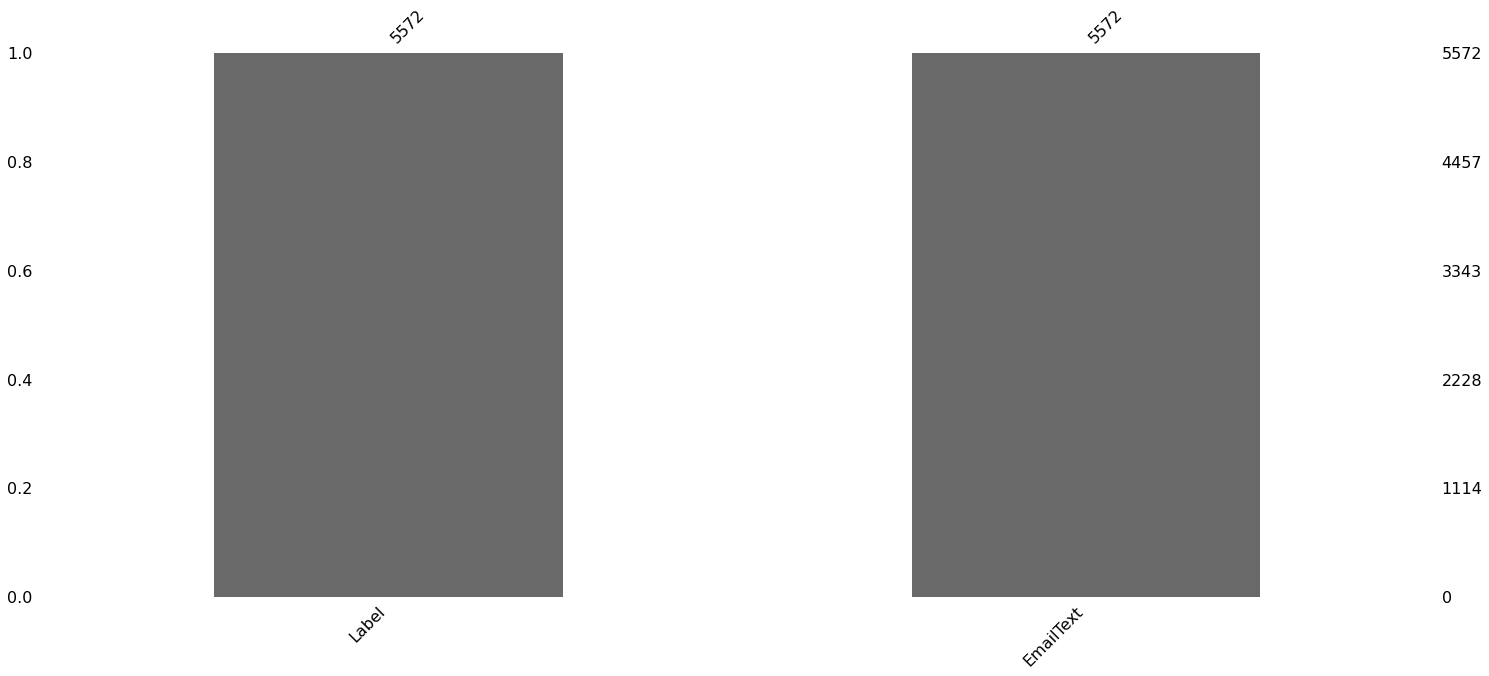

In [11]:
#visualizing the null values for each attribute


import missingno as msno

#msgo ---->  It's also the name of a Python library for the exploratory visualization of missing data.

msno.bar(df)
#ploting the bar graph

plt.show()
#Show the image

#### Note :
>- There are no missing values in the credit card data set

### countplot(): 
> - **Reference link for countplot:** https://seaborn.pydata.org/generated/seaborn.countplot.html
- Countplot() method is used to Show the counts of observations in each categorical bin using bars.
### Counter 
- Counter is a container which stores the count of elements in a dictionary format where element is the key and its value corrosponds to it's count.

Counter({'ham': 4825, 'spam': 747})


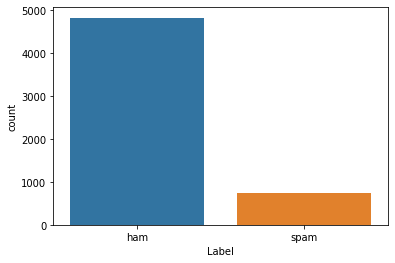

In [12]:
sns.countplot(x='Label', data = df)
#is used to Show the counts of observations in each categorical bin using bar


from collections import Counter
#Counter is a container which stores the count of elements in a dictionary format where element is the key and its value corrosponds to it's count.

counter = Counter( df [ 'Label' ])
#passing 'Class' feature in the Counter , it tells no. of 1s and 0s present in the dataset

print(counter)
#print the counter variable



**This indicates the imbalanced data had found**

#### Duplicate() : 
> Reference link for duplicate() method is : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
     

In [13]:
duplicatedRow = df[df.duplicated()]
print(duplicatedRow[:])

     Label                                          EmailText
102    ham  As per your request 'Melle Melle (Oru Minnamin...
153    ham  As per your request 'Melle Melle (Oru Minnamin...
206    ham  As I entered my cabin my PA said, '' Happy B'd...
222    ham                             Sorry, I'll call later
325    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]


**NOTE**
- To know the duplicates on the data, There are 403 rows of duplicates 

#### Remove the duplicates

In [14]:
#drop the duplicates by using duplicate maethod
df.drop_duplicates(inplace = True)

In [15]:
#show the new shape having number of rows and columns after duplication is dropped

print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

#printing the rows and columns 

There are 5169 rows and 2 columns are present in the Data Set


**Note**
> - **There are 403 duplicate records are present in the dataset so we are removed , now there is 5169 rows of data**

### Pre-processing


#### stop words -
>  Repeating words are known as stop words
- **How to remove stop words ?**
- first convert all the words into lower case and using the method stopwords.word()

In [17]:
from nltk.corpus import stopwords # for stop words

In [16]:


def pre_processing(text):
    
    text = str(text).lower()  # Converted into lower case
    
    spl_char_text = re.sub(r'[^a-z]',' ',text) # removed numbers and special characters
    
    # remove aall punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # remove all stop words
    
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # return a list of clean text
    return clean_words
    


In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
df['EmailText'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: EmailText, dtype: object

In [20]:
df['EmailText'].head().apply(pre_processing)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: EmailText, dtype: object

### CountVectorizer
>- Reference link for CountVectorizer : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- It Convert a collection of text documents into a matrix of token counts

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
#import a CountVectorizer

In [23]:
# convvert a collection of EmailText to a matrix of tokens

bow = CountVectorizer(analyzer= pre_processing).fit_transform(df['EmailText'],df['Label'])

#### Dummies():
- pd.get_dummies() is used for data manipulation. 
- It converts categorical data into dummy or indicator variables.
Parameters:

- data: whose data is to be manipulated.

- columns: Column names in the DataFrame that needs to be encoded. Default value is None, If columns is None then all the columns with object or category dtype will be converted.

- drop_first: Remove first level of dummies.
- dtype: Data type for new columns. Only a single dtype is allowed. Default value is np.uint8.


In [25]:
 df1 = pd.get_dummies(df, columns=['Label'], drop_first=True)

#spam = 1
#Ham =0

In [26]:
df1

,EmailText,Label_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ã_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


### Split the dataset into training and testing

#### Train_Test_Split
> - Reference link : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
> - **Train-Test Split Evaluation**
- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- It can be used for classification or regression problems and can be used for any supervised learning algorithm.

- The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.
- The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

>  common split percentages include:

- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50%

In [30]:
#Lets check the shape of the data, after pre_process,removed stopwords
bow.shape

(5169, 9431)

In [31]:

#importing train_test_split
from sklearn.model_selection import train_test_split

## split into train tests sets
x_train,x_test,y_train,y_test=train_test_split(bow,df1["Label_spam"],test_size=0.2)

### Build the model

###  Support Vector Machine

> - Reference link for SVM is : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

- The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

- SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. 



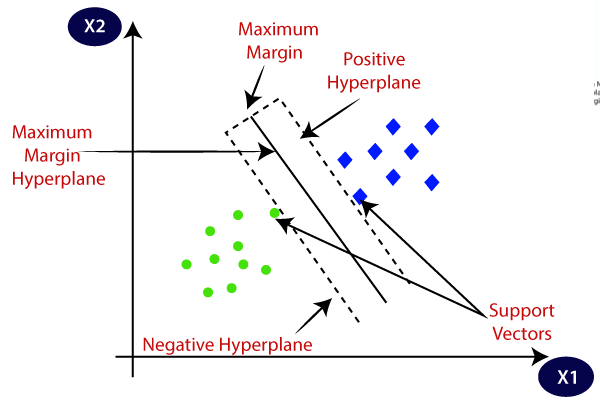

### GridSearchCV
>- Reference link for GridSearhCV is : https://scikit-learn.org/stable/modules/grid_search.html
- A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. 
- However, there are some parameters, known as Hyperparameters and those cannot be directly learned. They are commonly chosen by human based on some intuition or hit and trial before the actual training begins.
- These parameters exhibits their importance by improving performance of the model such as its complexity or its learning rate.
- Models can have many hyper-parameters and finding the best combination of parameters can be treated as a search problem.

> - Parameters are :
- Kernel   ----> choose the best Kernel 
- gamma    ----> how far the influence of a single training
- C        ----> C parameter trades off correct classification of training
        

In [32]:
# import the SVM

from sklearn import svm

#import GridSearchCV to know the best parameters
from sklearn.model_selection import GridSearchCV

In [33]:
##Step: Build a model

# Tunne all the parameters
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

#train the model with  perfrom all kernels, gamma, C 
model = GridSearchCV(svm.SVC(), tuned_parameters)

#Build the model and fit to train and test

model.fit(x_train,y_train)


#See the best parameters
print(model.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [39]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.399552,0.032502,0.101825,0.022938,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.877872,0.876663,0.876663,0.876663,0.876663,0.876904,0.000484,14
1,0.308078,0.034871,0.062835,0.007701,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.981862,0.972189,0.977025,0.977025,0.979444,0.977509,0.003208,1
2,0.375974,0.048906,0.084422,0.008491,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.875453,0.875453,0.875453,0.875453,0.875453,0.875453,0.000000,16
3,0.259317,0.017978,0.054158,0.005043,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.981862,0.972189,0.977025,0.977025,0.979444,0.977509,0.003208,1
4,0.353991,0.043610,0.075429,0.008663,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.963724,0.963724,0.968561,0.952842,0.970979,0.963966,0.006232,12
5,0.239054,0.009602,0.052473,0.003131,10,0.001,linear,"{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}",0.983071,0.970979,0.978235,0.975816,0.978235,0.977267,0.003929,3
6,0.353997,0.014979,0.079771,0.003240,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.877872,0.876663,0.876663,0.876663,0.876663,0.876904,0.000484,14
7,0.254083,0.025353,0.053352,0.006798,10,0.0001,linear,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}",0.983071,0.970979,0.978235,0.975816,0.978235,0.977267,0.003929,3
8,0.348280,0.059686,0.068722,0.005684,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.981862,0.969770,0.977025,0.973398,0.975816,0.975574,0.004003,10
9,0.290052,0.052389,0.057729,0.006757,100,0.001,linear,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.983071,0.970979,0.978235,0.975816,0.978235,0.977267,0.003929,3


### NOTE : Best Parameters are :
> - **'C':       100**
> - **'gamma':   0.001**
> - **'kernel':  'rbf'**

In [34]:
#Train the model, using the best parameters

model1=svm.SVC(C= 1, gamma= 0.001, kernel= 'linear',probability=True)

In [42]:
#Train the model, using the best parameters

model1=svm.SVC(C= 100, gamma= 0.001, kernel= 'rbf')

In [35]:
# fit the model on x_train, y_train
model1.fit(x_train,y_train)

SVC(C=1, gamma=0.001, kernel='linear', probability=True)

In [36]:
#predict the model on test 
y_pred=model1.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9845261121856866
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       1.00      0.88      0.94       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

[[896   0]
 [ 16 122]]
